In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, QuantileTransformer, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import matplotlib.pylab as plt

In [24]:
df_path = "c:/Users/Userpc/Desktop/Projects/ML Shortcuts/Data/data3.csv"
df = pd.read_csv(df_path)

<Axes: xlabel='x', ylabel='y'>

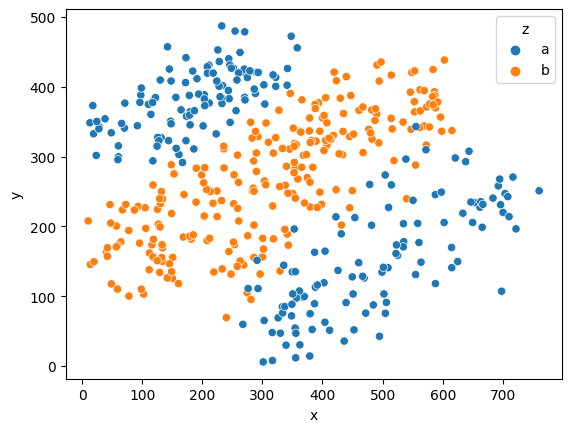

In [25]:
sns.scatterplot(data=df, x="x", y="y", hue="z")

In [26]:
X = df[["x", "z"]].values
y = df["y"]

In [27]:
numeric_feature = [0]
categorical_feature = [1]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_feature),
        ('cat', categorical_transformer, categorical_feature)
    ])

model = LinearRegression()
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

pipe.fit(X, y)
pred = pipe.predict(X)

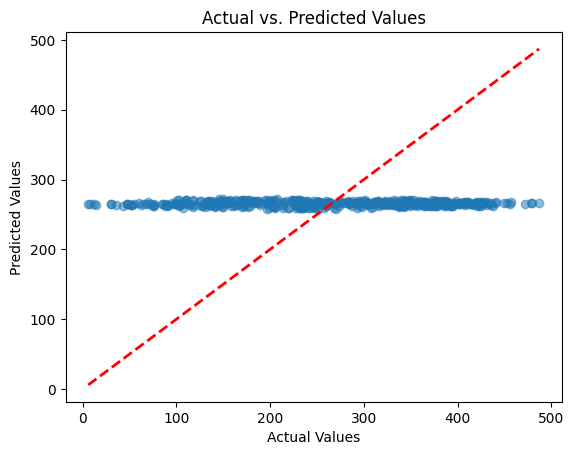

In [30]:
# Assuming 'y' contains your actual target values, and 'pred' contains the predicted values

# Create a scatter plot of actual vs. predicted values
plt.scatter(y, pred, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')

# Add a line representing the perfect prediction (y = x)
plt.plot([min(y), max(y)], [min(y), max(y)], linestyle='--', color='red', linewidth=2)

plt.show()